In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
import itertools

In [5]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train_df['label']

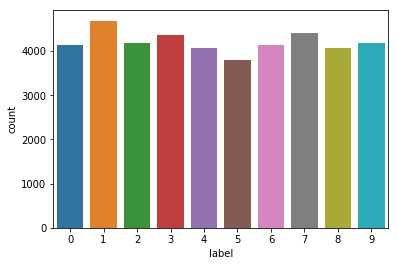

In [9]:
sns.countplot(Y_train)

In [10]:
X_train = train_df.drop('label',axis=1)

In [11]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [13]:
X_train = X_train/255.0
test_df = test_df/255.0

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)

In [15]:
X_train.shape

(42000, 28, 28, 1)

In [16]:
Y_train = to_categorical(Y_train,num_classes=10)

In [17]:
Y_train.shape

(42000, 10)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

In [19]:
X_train.shape

(37800, 28, 28, 1)

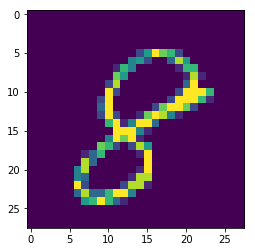

In [20]:
plt.imshow(X_train[0][:,:,0])

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))

In [23]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))

In [24]:
model.add(MaxPool2D(pool_size=(2,2)))

In [25]:
model.add(Dropout(0.25))

In [26]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

In [27]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

In [28]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [29]:
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(256,activation='relu'))

In [32]:
model.add(Dropout(0.5))

In [33]:
model.add(Dense(10,activation='softmax'))

In [34]:
optimizer = RMSprop(learning_rate=0.001)

In [35]:
model.compile(optimizer=optimizer,loss="catgorical_crossentropy",metrics=["accuracy"])

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,min_lr=0.00001,verbose=1)

In [37]:
epoch = 1

In [38]:
batch_size = 86

In [54]:
history = model.fit(x=X_train,y=Y_train,batch_size=86,epochs=epoch,verbose=2,callbacks=[learning_rate_reduction],validation_data=(X_test,y_test),steps_per_epoch=X_train.shape[0]//batch_size)

AttributeError: 'Sequential' object has no attribute '_feed_output_names'